# Data Mining Assignment


## Business Understanding 

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31 % of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease. 

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help. (Fedesoriano, 2021) 

We built a model that predicts the probability of having a heart disease based on risk factors and other characteristics of a patient using Logistic Regression. 

To solve this problem, we chose a dataset from Kaggle: 
https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data 

In [30]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

df= pd.read_csv("heart.csv")
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Data Understanding

The dataset contains 12 columns – 5 categorical attributes and 7 numerical. The target variable is a binary feature “Heart Disease”, where 1 means heart disease, 0 means healthy. 

This is the description of predictor variables (Fedesoriano, 2021): 

Age: age of the patient [years] 

Sex: sex of the patient [M: Male, F: Female] 

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]4. 

RestingBP: resting blood pressure [mm Hg] 

Cholesterol: serum cholesterol [mm/dl] 

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise] 

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria] 

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202] 

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]; chest pain or discomfort that happens during physical activity 

Oldpeak: oldpeak = ST [Numeric value measured in depression], is used to assess how well the heart handles stress 

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping – generally considered normal and less concerning, Flat: flat – potential of heart disease, Down: downsloping – sign of serious heart problems] 

 

We found out that there are not any missing values in the dataset. 

The distribution of target variable is even, meaning that it does not negatively affect the model’s performance. 

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [32]:
# Checking for missing values
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [57]:
# Target variable distribution
count_disease = df["HeartDisease"].value_counts() # counts the distribution of both values
prop_disease = df["HeartDisease"].value_counts(normalize=True) # normalized (0-1)
print(count_disease)
print(prop_disease)

HeartDisease
1    508
0    410
Name: count, dtype: int64
HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64


## Data Preparation

We began by normalizing the data to scale it, so the model works properly and doesn’t skew the results.  

We converted the string data into integer using pd.get_dummies to make the dataframe ready for the model.  

We checked for multicollinearity between the predictor variables that would possibly cause unstable estimates of coefficients and reduction of predictive power (Bobbitt, 2019). This analysis revealed that “Up” and “Flat” categories of ST_Slope were highly correlated. After creating a countplot of ST_Slope feature, we found that the “Down” category was underrepresented in the dataset. To address this imbalance, we merged the “Flat” and “Down” columns into a single group (as the opposite of “Up”). Then, we dropped the “Up” column to use it as a reference category.     

The updated variance inflation factors (VIF) did not show any cases of high multicollinearity. 

Then, we created training and testing data to help train the model. We used 70% of the data to train and 30% to test the model. 


In [34]:
import numpy as np

def normalize(x):                               # Creating a function
    return (x - min(x)) / (max(x) - min(x))     # distance of (item value - minimum vector value) divided by the range of all vector values


testSet1 = np.arange(1, 6)                      # Using numpy to set a test range
testSet2 = np.arange(1, 6) * 10


print(f"testSet1: {testSet1}\n")                #Printing Test set 
print(f"testSet2: {testSet2}\n")

print(f"Normalized testSet1: {normalize(testSet1)}\n")           #Printing normalized test set
print(f"Normalized testSet2: {normalize(testSet2)}\n")   


# So, the function works.

testSet1: [1 2 3 4 5]

testSet2: [10 20 30 40 50]

Normalized testSet1: [0.   0.25 0.5  0.75 1.  ]

Normalized testSet2: [0.   0.25 0.5  0.75 1.  ]



In [35]:
df1 = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], 
                    drop_first=True, dtype=int)

# Checking for multicollinearity 
#VIF 

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif #import the VIF function 
from statsmodels.tools.tools import add_constant #import the add_constant function 


X = df1.drop("HeartDisease", axis=1).dropna()  
X = add_constant(X)  

#Create a dataframe that contains the VIF values 
VIF_data = pd.DataFrame() #create a pandas dataframe 
VIF_data["variable"] = X.columns #create a variable that simply lists the names of the variables you picked 
VIF_data["VIF"] = [vif(X,i)  
                   for i in range(len(X.columns))] #a loop that creates vif values for each variable and then puts it in the VIF column 

print(VIF_data) #print the results 


             variable         VIF
0               const  190.192247
1                 Age    1.395579
2           RestingBP    1.124341
3         Cholesterol    1.235444
4           FastingBS    1.147103
5               MaxHR    1.556617
6             Oldpeak    1.534675
7               Sex_M    1.105078
8   ChestPainType_ATA    1.505606
9   ChestPainType_NAP    1.263967
10   ChestPainType_TA    1.120390
11  RestingECG_Normal    1.741934
12      RestingECG_ST    1.704894
13   ExerciseAngina_Y    1.583291
14      ST_Slope_Flat    4.513918
15        ST_Slope_Up    5.523789


We noticed multicollinearity due to fewer instances of ST_Slope_Down

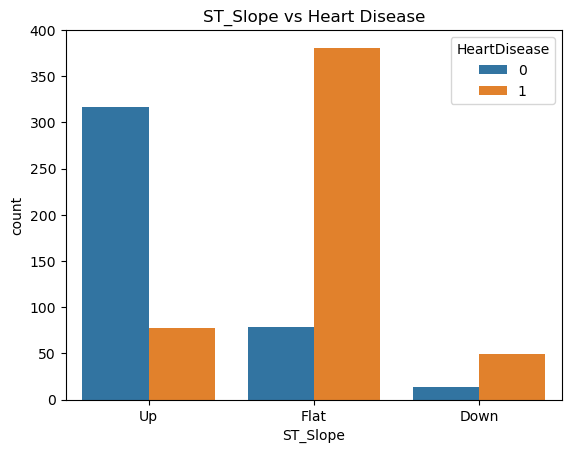

In [36]:
sn.countplot(x=df['ST_Slope'],hue=df['HeartDisease'])
plt.title("ST_Slope vs Heart Disease")
plt.show()

In [37]:
ST_Slope_Dummies= pd.get_dummies(df['ST_Slope'], dtype=int)
print(ST_Slope_Dummies)
ST_Slope_Dummies= ST_Slope_Dummies.drop(["Down","Flat"], axis=1)
ST_Slope_Dummies['ST_Slope_D+F']= 1 - ST_Slope_Dummies['Up']
ST_Slope_Dummies = ST_Slope_Dummies.drop('Up', axis=1)
print(ST_Slope_Dummies)
df = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina'], 
                    drop_first=True, dtype=int)
df = pd.concat([ST_Slope_Dummies, df],axis=1).drop("ST_Slope",axis=1)
print(df.head())



     Down  Flat  Up
0       0     0   1
1       0     1   0
2       0     0   1
3       0     1   0
4       0     0   1
..    ...   ...  ..
913     0     1   0
914     0     1   0
915     0     1   0
916     0     1   0
917     0     0   1

[918 rows x 3 columns]
     ST_Slope_D+F
0               0
1               1
2               0
3               1
4               0
..            ...
913             1
914             1
915             1
916             1
917             0

[918 rows x 1 columns]
   ST_Slope_D+F  Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  \
0             0   40        140          289          0    172      0.0   
1             1   49        160          180          0    156      1.0   
2             0   37        130          283          0     98      0.0   
3             1   48        138          214          0    108      1.5   
4             0   54        150          195          0    122      0.0   

   HeartDisease  Sex_M  ChestPainType_ATA  Ch

In [38]:
# Checking for multicollinearity 
#VIF 

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif #import the VIF function 
from statsmodels.tools.tools import add_constant #import the add_constant function 


X = df.drop("HeartDisease", axis=1).dropna()  
X = add_constant(X)  

#Create a dataframe that contains the VIF values 
VIF_data = pd.DataFrame() #create a pandas dataframe 
VIF_data["variable"] = X.columns #create a variable that simply lists the names of the variables you picked 
VIF_data["VIF"] = [vif(X,i)  
                   for i in range(len(X.columns))] #a loop that creates vif values for each variable and then puts it in the VIF column 

print(VIF_data) #print the results 


             variable         VIF
0               const  180.970509
1        ST_Slope_D+F    1.606767
2                 Age    1.391983
3           RestingBP    1.118713
4         Cholesterol    1.228550
5           FastingBS    1.143646
6               MaxHR    1.554806
7             Oldpeak    1.439361
8               Sex_M    1.104936
9   ChestPainType_ATA    1.503961
10  ChestPainType_NAP    1.263961
11   ChestPainType_TA    1.120351
12  RestingECG_Normal    1.741013
13      RestingECG_ST    1.704478
14   ExerciseAngina_Y    1.582994


## Modelling and Evaluation

We created the model and fitted the necessary training data. We did not specify any hyperparameters, so the model used default values. 

We created a new variable to store the predictions of the model. 

We evaluated the accuracy of the model using different metrics such as the accuracy score, confusion matrix and classification report. 

We were able to achieve an accuracy of 88%.  

 

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assume A contains your predictors and B contains your binary target variable
A = df.drop("HeartDisease", axis=1)
A = A.apply(normalize, axis=0)
print(A.describe())
B = df['HeartDisease']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(A, B, test_size=0.3, random_state=42)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


       ST_Slope_D+F         Age   RestingBP  Cholesterol   FastingBS  \
count    918.000000  918.000000  918.000000   918.000000  918.000000   
mean       0.569717    0.520630    0.661983     0.329684    0.233115   
std        0.495386    0.192502    0.092571     0.181400    0.423046   
min        0.000000    0.000000    0.000000     0.000000    0.000000   
25%        0.000000    0.387755    0.600000     0.287313    0.000000   
50%        1.000000    0.530612    0.650000     0.369818    0.000000   
75%        1.000000    0.653061    0.700000     0.442786    0.000000   
max        1.000000    1.000000    1.000000     1.000000    1.000000   

            MaxHR     Oldpeak       Sex_M  ChestPainType_ATA  \
count  918.000000  918.000000  918.000000         918.000000   
mean     0.540911    0.396291    0.789760           0.188453   
std      0.179298    0.121201    0.407701           0.391287   
min      0.000000    0.000000    0.000000           0.000000   
25%      0.422535    0.295455  

## Interpretation

We printed the coefficients and odds ratios for easy interpretation

We looked at the logistic regression coefficients and found a few factors that lead to an increased risk of heart disease: 

ST_Slope_D+F- People with either down or flat ST slope tend to have much higher risk (8.85x more) of having a heart disease than the ones with up ST Slope. 

Oldpeak is the effect of stress on the heart and we found that an increase in 1 unit of Oldpeak leads to a 5.1x increase in the risk of heart disease. 

Sex- Men tend to be at higher risk of having a heart disease (2.87x more than women) 

Exercise Angina (Discomfort during physical activity) Having Exercise-Induced Angina increases heart disease odds by 3x. 

 
 

In [ ]:
import numpy as np

# Print model coefficients
print("Intercept:", model.intercept_[0])  
print("Coefficients:", model.coef_)       

# Create a DataFrame for easy interpretation
summary_df = pd.DataFrame({
    'Feature': list(A.columns),  # Feature names
    'Coefficient': model.coef_[0],  # Coefficients
    'Odds Ratio': np.exp(model.coef_[0]) 
})

print("\nLogistic Regression Summary:")
print(summary_df)





Intercept: -2.2871580695581186
Coefficients: [[ 2.18079484  0.68266202  0.11369969 -1.40077223  0.92980428 -0.38463673
   1.63009295  1.05260471 -1.35119042 -1.24935495 -0.82511211 -0.0711642
  -0.26173639  1.09817993]]

Logistic Regression Summary:
              Feature  Coefficient  Odds Ratio
0        ST_Slope_D+F     2.180795    8.853340
1                 Age     0.682662    1.979139
2           RestingBP     0.113700    1.120416
3         Cholesterol    -1.400772    0.246407
4           FastingBS     0.929804    2.534013
5               MaxHR    -0.384637    0.680698
6             Oldpeak     1.630093    5.104349
7               Sex_M     1.052605    2.865104
8   ChestPainType_ATA    -1.351190    0.258932
9   ChestPainType_NAP    -1.249355    0.286690
10   ChestPainType_TA    -0.825112    0.438186
11  RestingECG_Normal    -0.071164    0.931309
12      RestingECG_ST    -0.261736    0.769714
13   ExerciseAngina_Y     1.098180    2.998703


#### KNN Model

In [41]:
from sklearn.model_selection import train_test_split
                                                                        # Creating a variable that stores the diagnosis column
X_train, X_test, y_train, y_test = train_test_split( A, B, test_size=0.3, random_state=42)      # Creating different training and testing sets. 
# "A"= All the data except the diagnosis column. "B"= What needs to be tested i.e the diagnosis. 
# "test size" means 30% of the data will be tested and 70% will be used for training
# "Random state=42" helps to ensure that the same data points are used for testing every time the code is run.

print(f"y_train:", y_train)
print(f"y_test:", y_test)

y_train: 712    1
477    1
409    1
448    1
838    1
      ..
106    0
270    0
860    1
435    0
102    1
Name: HeartDisease, Length: 642, dtype: int64
y_test: 668    0
30     1
377    1
535    1
807    0
      ..
133    1
813    0
734    1
360    1
875    0
Name: HeartDisease, Length: 276, dtype: int64


In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=7)         # Model will look at the 5 closest training points tomake predictions
knn.fit(X_train, y_train)                        # Specifying the data that the model should look at to make predictions
y_pred= knn.predict(X_test)
print(y_pred)

[0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1
 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0
 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1
 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0
 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1
 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1
 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1
 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0]


[[ 96  16]
 [ 19 145]]


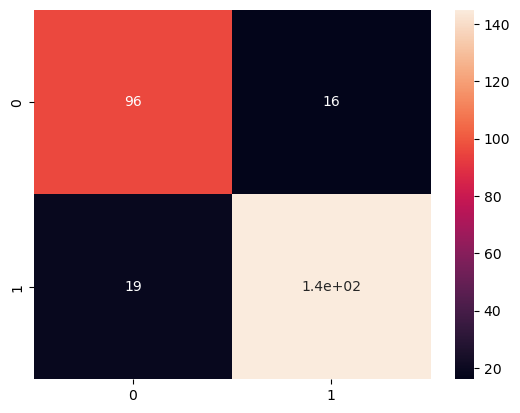

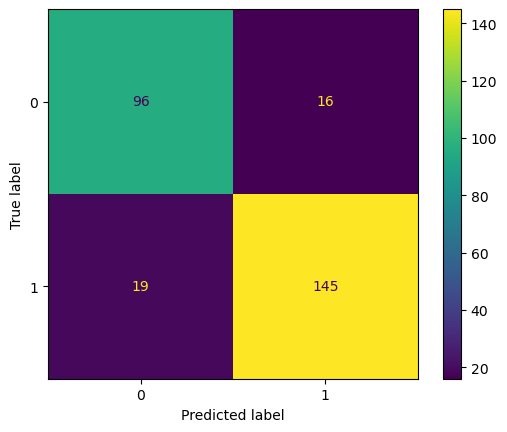

In [43]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)                 #createss a confusion matrix. "y_test= actual values that should have been predicted"
# "y_pred"= the values that were actually predicted and "labels=knn.classes"= all the categories in the data including ones which may not have been predicted
print(cm)

sn.heatmap(cm, annot=True)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

In [44]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       112
           1       0.90      0.88      0.89       164

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276



# Naive-Bayes

## Business Understanding

AI has become increasingly relevant in today’s world. Thus, it becomes important to evaluate the authenticity of the content generated. There are various AI Detection sites available on the internet which use different methods to do so. We have created a model that detects AI using “Naive Bayes”, and used a dataset from Kaggle to do so. 

https://www.kaggle.com/datasets/sunilthite/llm-detect-ai-generated-text-dataset 



In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Load dataset (replace with actual dataset)
ai = pd.read_csv("Training_Essay_Data.csv")  
ai.head()

ai_new = pd.read_csv("train_essays_7_prompts.csv")
ai_combined = pd.concat([ai, ai_new], ignore_index= True)

# Split into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(ai_combined["text"], ai_combined["generated"], test_size=0.3, random_state=42)


In [46]:
ai_combined.head()

,text,generated
0,Car-free cities have become a subject of incre...,1
1,"Car Free Cities Car-free cities, a concept ga...",1
2,A Sustainable Urban Future Car-free cities ...,1
3,Pioneering Sustainable Urban Living In an e...,1
4,The Path to Sustainable Urban Living In an ...,1


## Data Understanding

The dataset contains two columns: “text” and “generated”. Text includes more than 24000 essays written by students and AI generated texts. The “generated” column then labels the data as either human written (0) or AI generated (1). 

In [47]:
print(ai_combined["generated"].value_counts())

generated
0    24682
1    12802
Name: count, dtype: int64


## Data Preparation

The "text" column needs to be converted into numbers for the model to understand it. For this, we use the TFID Vectorizer which assigns a number to each word based on its importance. Eg: Words like "as","the" etc. occur often and hence have relatively low importance.

In [52]:
vectorizer = TfidfVectorizer(max_features=2000)  # Convert text into features
xTrain_tfidf = vectorizer.fit_transform(xTrain)
xTest_tfidf = vectorizer.transform(xTest)


## Modelling

We decided to create a Naive Bayes model and fitted the necessary training data. The model used the default parameters. However, Naive Bayes assumes that all words are independent and does not consider the context in which they occur. This may affect its predictive power

In [53]:
model = MultinomialNB()  # Create a Naïve Bayes model
model.fit(xTrain_tfidf, yTrain)  # Train the model


MultinomialNB()

## Evaluation

We evaluated the accuracy of the model using different metrics such as the accuracy score, confusion matrix and classification report. 

We were able to achieve an accuracy of 96%.  

 

Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      7421
           1       0.98      0.91      0.94      3825

    accuracy                           0.96     11246
   macro avg       0.97      0.95      0.96     11246
weighted avg       0.96      0.96      0.96     11246



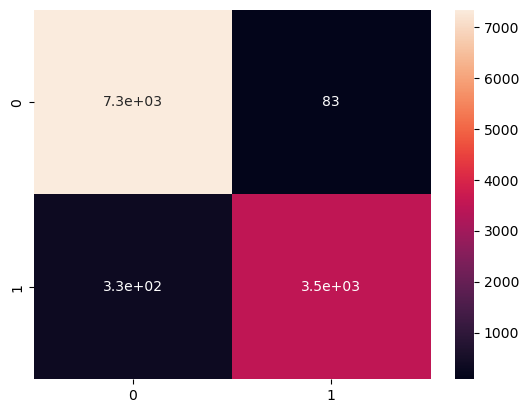

In [56]:
yPred = model.predict(xTest_tfidf)  # Predict on test data
accuracy = accuracy_score(yTest, yPred)  # Check accuracy
print(f"Accuracy: {accuracy:.2f}")  # Example: 85-90% accuracy

cm1= confusion_matrix(yTest, yPred, labels= model.classes_)
report1 = classification_report(yTest, yPred)

sn.heatmap(cm1, annot=True)
print(report1)

In [55]:
new_text = ["This research aims to explore new frontiers of artificial intelligence."]
new_text_tfidf = vectorizer.transform(new_text)

prediction = model.predict(new_text_tfidf)
print("AI-generated" if prediction[0] == 1 else "Human-written")


AI-generated
